Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.92      0.93      1205
        True       0.42      0.44      0.43       152

    accuracy                           0.87      1357
   macro avg       0.68      0.68      0.68      1357
weighted avg       0.87      0.87      0.87      1357

Confusion Matrix:
[[1113   92]
 [  85   67]]


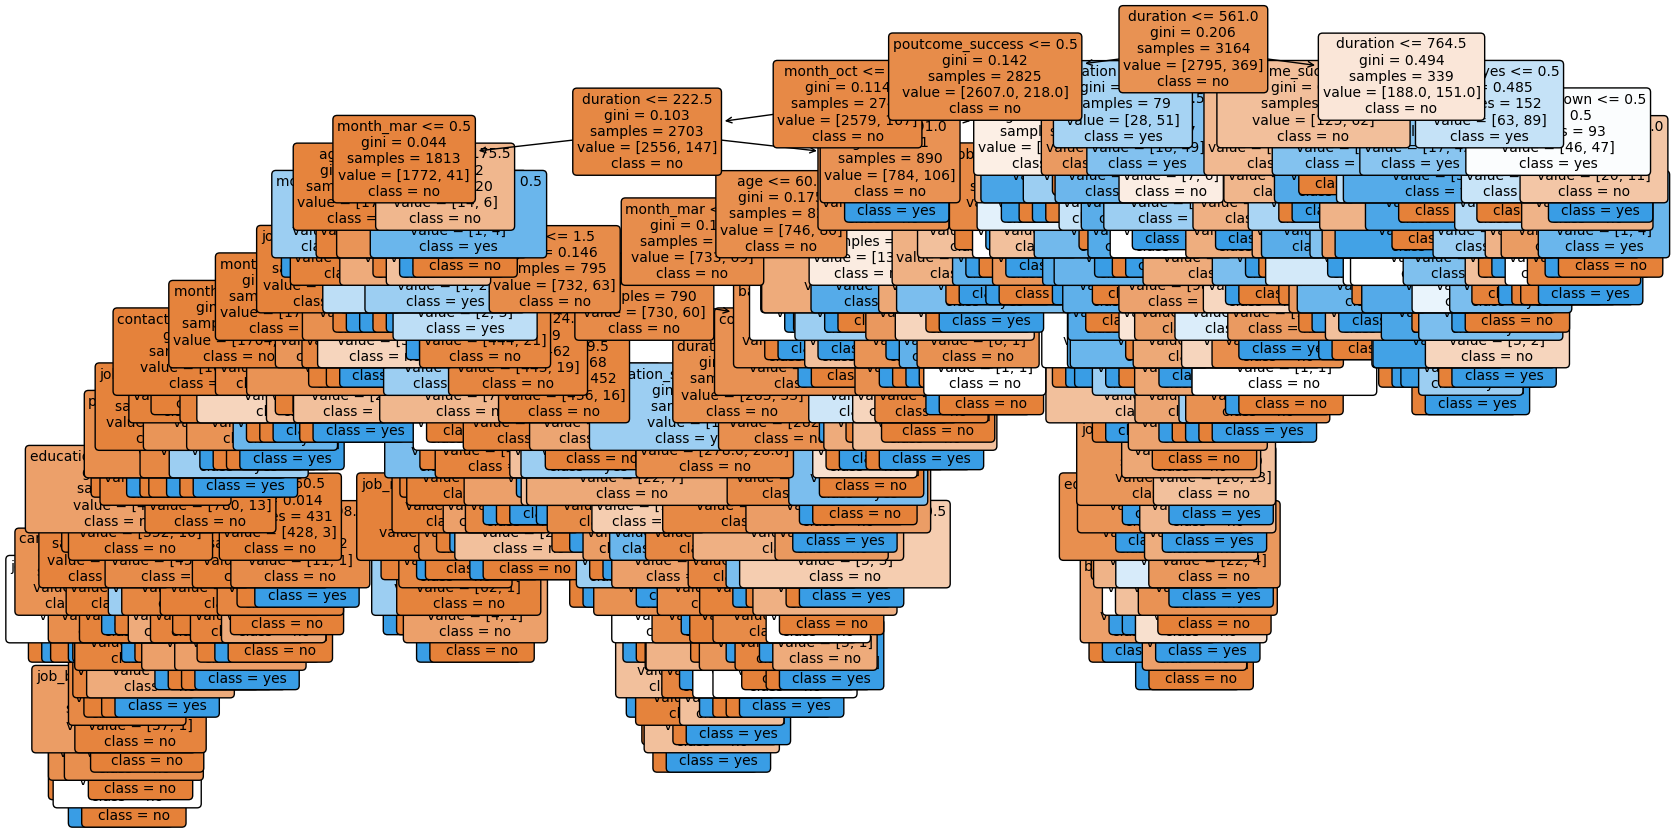

|--- duration <= 561.00
|   |--- poutcome_success <= 0.50
|   |   |--- month_oct <= 0.50
|   |   |   |--- duration <= 222.50
|   |   |   |   |--- month_mar <= 0.50
|   |   |   |   |   |--- age <= 20.00
|   |   |   |   |   |   |--- month_feb <= 0.50
|   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |--- month_feb >  0.50
|   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- age >  20.00
|   |   |   |   |   |   |--- age <= 70.50
|   |   |   |   |   |   |   |--- pdays <= 375.50
|   |   |   |   |   |   |   |   |--- job_student <= 0.50
|   |   |   |   |   |   |   |   |   |--- month_sep <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- month_feb <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |   |--- month_feb >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- month_sep >  0.50
|   |   |   |   |   |   |   

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
url = "C:/Users/tarun/Desktop/bank.csv"
df = pd.read_csv(url, sep=';')

# Preprocess the data
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop('y_yes', axis=1)  # All columns except the target
y = df['y_yes']  # The target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['no', 'yes'], filled=True, rounded=True, fontsize=10)
plt.show()

# Display text representation of the tree
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

In [ ]:
https://meet.google.com/xtd-xwus-rau?pli=1